In [7]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc

import pandas as pd
import time
from scipy import interp


from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import  RandomForestClassifier
import scipy.stats as stats

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2


from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.manifold import TSNE


In [3]:
estimators = [('reduce_dim', PCA()), 
             ('clf', SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
make_pipeline(Binarizer(), MultinomialNB())


Pipeline(memory=None,
     steps=[('binarizer', Binarizer(copy=True, threshold=0.0)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [6]:
pipe.steps[0]

('reduce_dim',
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False))

In [7]:
pipe.named_steps['reduce_dim']

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pipe.set_params(clf__C=10)

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [11]:
pipe.named_steps.reduce_dim is pipe.named_steps['reduce_dim']

True

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = dict( reduce_dim__n_components=[2,5,10],)
                 clf__C=[0.1,10,100])
grid_search = GridSearchCV(pipe, param_grid=param_grid)

In [91]:
grid_search

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function pqn_normalize at 0x7f8991769320>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'reduce_dim__n_components': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

**Run grid search to find params for dimensionality reduction, then do a logistic regression**


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [18]:
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2,4,8]
C_OPTIONS = [1,10,100,1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    }
]

reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'classify__C': [1, 10, 100, 1000], 'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=None, shuffle=Fa...dim': [SelectKBest(k=8, score_func=<function chi2 at 0x7f89986156e0>)], 'reduce_dim__k': [2, 4, 8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=

In [19]:
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
print(mean_scores)


[[ 0.49304396  0.69337785  0.8425153 ]
 [ 0.32109071  0.65831942  0.82025598]
 [ 0.31274346  0.64830273  0.81858653]]


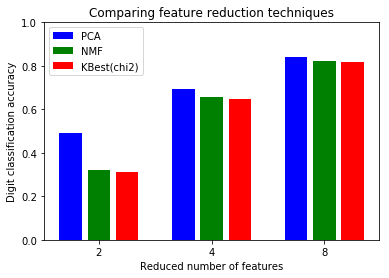

In [22]:
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()

<h2> Now do a more informative example </h2>
Example from : https://tomaugspurger.github.io/scalable-ml-01.html

In [23]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [24]:
#Let's make a learning curve

# invent a classification problem
X, y = samples_generator.make_classification(
    n_features=100, n_informative=5, n_redundant=10, n_classes=4,
    n_clusters_per_class=2)



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

digits = load_digits()
X, y = digits.data, digits.target

title = 'Learning Curves (Naive Bayes)'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01),
                   cv=cv, n_jobs=4)



<module 'matplotlib.pyplot' from '/home/irockafe/miniconda2/envs/isaac_revo_healthcare/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

(100, 1000)


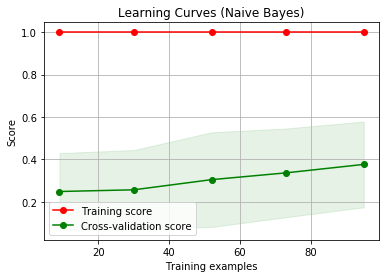

In [55]:
X, y = samples_generator.make_classification(
    n_features=1000, n_informative=10, n_redundant=10, n_classes=4,
    n_clusters_per_class=1,
    n_samples=100)

print(X.shape)

cv = ShuffleSplit(n_splits=50, test_size=0.05, random_state=0)

my_plot = plot_learning_curve(estimator, title, X, y,
                   cv=cv, n_jobs=4)

my_plot.show()

In [80]:
X_toy = np.array([[1,2,3], 
              [10, 50, 15],
              [100, 500, 150]])
a = np.array([])

print X_toy
print np.mean(X_toy, axis=0)


[[  1   2   3]
 [ 10  50  15]
 [100 500 150]]
[  37.  184.   56.]


In [9]:
def pqn_normalize(X):
    feature_means = np.mean(X, axis=0)
    # mean-center each feature
    X_mean_centered = np.divide(X, feature_means)
    dilution_factors = np.median(X_mean_centered, axis=1)
    # broadcast correctly
    X_pqn = np.divide(X, dilution_factors[:,np.newaxis] )
    return X_pqn
    
pqn_normalize(X_toy)

NameError: name 'X_toy' is not defined

In [2]:


X, y = samples_generator.make_classification(
    n_features=100, n_informative=10, n_redundant=10, n_classes=2,
    n_clusters_per_class=1,
    n_samples=20)

pipe = Pipeline([
    ('pqn_normalize', FunctionTransformer(pqn_normalize)),
    ('rf_clf', RandomForestClassifier())
    ])

param_grid = dict(rf_clf__n_estimators = np.int_(
    np.round(
        np.linspace(50, 2000, 10)
            ))
            )

n_iter = 5
test_size = 0.3
random_state = 1
cv = StratifiedShuffleSplit(n_splits=n_iter, test_size=test_size, random_state=random_state)

#param_grid = {rf_clf__n_estimators=stats.uniform()}
grid_search = GridSearchCV(pipe, param_grid=param_grid,
                          scoring='roc_auc',
                          cv=cv)


NameError: name 'samples_generator' is not defined

In [127]:
np.int_(np.array([10.2, 11.5]))

array([10, 11])

In [166]:
print y
grid_search.fit(X, y)


[0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0]


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pqn_normalize', FunctionTransformer(accept_sparse=False,
          func=<function pqn_normalize at 0x7f8994658f50>,
          inv_kw_args=None, inverse_func=None, kw_args=None,
          pass_y='deprecated', validate=True)), ('rf_clf', RandomForestClassifier(bootstrap=True, class_weight=Non...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf_clf__n_estimators': array([  50,  267,  483,  700,  917, 1133, 1350, 1567, 1783, 2000])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [168]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rf_clf__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.148237,0.004977,0.788889,1.0,50,{u'rf_clf__n_estimators': 50},9,0.888889,1.0,0.666667,...,0.555556,1.0,0.833333,1.0,1.000000,1.0,0.033036,0.000753,0.158698,0.0
1,0.783298,0.020277,0.844444,1.0,267,{u'rf_clf__n_estimators': 267},5,1.000000,1.0,0.888889,...,0.777778,1.0,0.777778,1.0,0.777778,1.0,0.089676,0.000253,0.088889,0.0
2,1.380964,0.041912,0.866667,1.0,483,{u'rf_clf__n_estimators': 483},3,1.000000,1.0,1.000000,...,0.666667,1.0,0.888889,1.0,0.777778,1.0,0.059686,0.011294,0.129577,0.0
3,2.126229,0.053235,0.777778,1.0,700,{u'rf_clf__n_estimators': 700},10,1.000000,1.0,1.000000,...,0.666667,1.0,0.333333,1.0,0.888889,1.0,0.184503,0.002560,0.253372,0.0
4,2.540990,0.069782,0.911111,1.0,917,{u'rf_clf__n_estimators': 917},1,1.000000,1.0,1.000000,...,0.888889,1.0,0.777778,1.0,0.888889,1.0,0.066339,0.004871,0.083148,0.0
5,3.639507,0.101621,0.822222,1.0,1133,{u'rf_clf__n_estimators': 1133},7,1.000000,1.0,1.000000,...,0.777778,1.0,0.555556,1.0,0.777778,1.0,0.572956,0.013427,0.166296,0.0
6,3.980732,0.110372,0.866667,1.0,1350,{u'rf_clf__n_estimators': 1350},3,1.000000,1.0,0.888889,...,0.888889,1.0,0.777778,1.0,0.777778,1.0,0.170367,0.018126,0.083148,0.0
7,4.722150,0.117296,0.822222,1.0,1567,{u'rf_clf__n_estimators': 1567},7,1.000000,1.0,0.888889,...,0.666667,1.0,0.777778,1.0,0.777778,1.0,0.622835,0.004769,0.113312,0.0
8,4.946687,0.140082,0.877778,1.0,1783,{u'rf_clf__n_estimators': 1783},2,1.000000,1.0,1.000000,...,0.777778,1.0,0.722222,1.0,0.888889,1.0,0.179234,0.011329,0.113312,0.0
9,5.979025,0.167441,0.844444,1.0,2000,{u'rf_clf__n_estimators': 2000},5,1.000000,1.0,1.000000,...,0.666667,1.0,0.777778,1.0,0.777778,1.0,0.335274,0.021680,0.133333,0.0


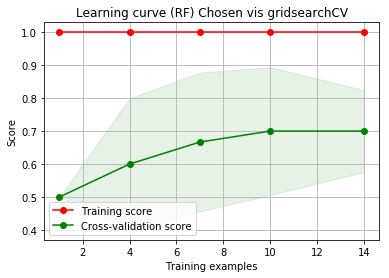

In [172]:
# Now plot a learning curve with given parameters

cv_learn_curve = StratifiedShuffleSplit(
    n_splits=25, test_size=0.3, random_state=random_state)

my_plt = plot_learning_curve(grid_search.best_estimator_, 
                           'Learning curve (RF) Chosen vis gridsearchCV',
                           X, y, cv=cv, n_jobs=4)
my_plt.show()

In [186]:
# Get an ROC curve plot from the best estimator

def roc_curve_cv(X, y, clf, cross_val,
                path='/home/irockafe/Desktop/roc.pdf',
                save=False, plot=True):  
    t1 = time.time()
    # collect vals for the ROC curves
    tpr_list = []
    mean_fpr = np.linspace(0,1,100)
    auc_list = []
    
    # Get the false-positive and true-positive rate
    for i, (train, test) in enumerate(cross_val.split(X,y)):
        clf.fit(X[train], y[train])
        y_pred = clf.predict_proba(X[test])[:,1]
        
        # get fpr, tpr
        fpr, tpr, thresholds = roc_curve(y[test], y_pred)
        roc_auc = auc(fpr, tpr)
        #print 'AUC', roc_auc
        #sns.plt.plot(fpr, tpr, lw=10, alpha=0.6, label='ROC - AUC = %0.2f' % roc_auc,)
        #sns.plt.show()
        tpr_list.append(interp(mean_fpr, fpr, tpr))
        tpr_list[-1][0] = 0.0
        auc_list.append(roc_auc)
        
        if (i % 10 == 0):
            print '{perc}% done! {time}s elapsed'.format(perc=100*float(i)/cross_val.n_splits,
                                                         time=(time.time() - t1))
        
            
        
        
    # get mean tpr and fpr
    mean_tpr = np.mean(tpr_list, axis=0)
    # make sure it ends up at 1.0
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(auc_list)
    
    if plot:
        # plot mean auc
        plt.plot(mean_fpr, mean_tpr, label='Mean ROC - AUC = %0.2f $\pm$ %0.2f' % (mean_auc, 
                                                                                       std_auc),
                    lw=5, color='b')

        # plot luck-line
        plt.plot([0,1], [0,1], linestyle = '--', lw=2, color='r',
                    label='Luck', alpha=0.5) 

        # plot 1-std
        std_tpr = np.std(tpr_list, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                            label=r'$\pm$ 1 stdev')

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve, {iters} iterations of {cv} cross validation'.format(
            iters=cross_val.n_splits, cv='{train}:{test}'.format(test=cross_val.test_size, train=(1-cross_val.test_size)))
                 )
        plt.legend(loc="lower right")

        if save:
            plt.savefig(path,  format='pdf')


        #plt.show()
    return plt, tpr_list, auc_list, mean_fpr

roc_cv = StratifiedShuffleSplit(
    n_splits=5, test_size=0.3, random_state=random_state)
print roc_cv
plt, tpr_list, auc_list, mean_fpr = roc_curve_cv(X, y, grid_search.best_estimator_, cross_val=roc_cv)

StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.3,
            train_size=None)
0.0% done! 2.72130203247s elapsed


<h2> Great, looks like everything works okay. Let's clean it up a bit </h2>

In [197]:
def rf_gridsearch(X, y):
    # TODO How to require pqn_normalize to be a function accessible here?
    # Make your gridsearch pipeline
    pipe = Pipeline([
        ('pqn_normalize', FunctionTransformer(pqn_normalize)),
        ('rf_clf', RandomForestClassifier())
        ])

    #param_grid = dict(rf_clf__n_estimators = np.int_(
        np.round(
            np.linspace(50, 2000, 10)
                ))
                )

    n_splits = 15
    test_size = 0.3
    random_state = 1
    cv = StratifiedShuffleSplit(n_splits=n_splits, 
                                test_size=test_size, 
                                random_state=random_state)

    #param_grid = {rf_clf__n_estimators=stats.uniform()}
    grid_search = GridSearchCV(pipe, param_grid=param_grid,
                              scoring='roc_auc',
                              cv=cv,
                              n_jobs=4)
    grid_search.fit(X, y)
    return grid_search

grid = rf_gridsearch(X, y)

<h2> Duh. Don't cross-validate the number of estimators - always better with more (asymptotically) </h2> Could do a few other things instead

In [199]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_rf_clf__n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split10_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.287577,0.010042,0.774074,1.0,50,{u'rf_clf__n_estimators': 50},10,1.0,1.0,1.000000,...,0.777778,1.0,1.000000,1.0,0.555556,1.0,0.019909,0.003019,0.215134,2.866584e-17
1,1.624561,0.037549,0.862963,1.0,267,{u'rf_clf__n_estimators': 267},1,1.0,1.0,0.888889,...,0.777778,1.0,1.000000,1.0,0.555556,1.0,0.194827,0.002606,0.155644,0.000000e+00
2,2.968070,0.079170,0.822222,1.0,483,{u'rf_clf__n_estimators': 483},9,1.0,1.0,1.000000,...,0.555556,1.0,1.000000,1.0,0.555556,1.0,0.185550,0.025400,0.180534,0.000000e+00
3,4.563777,0.131663,0.851852,1.0,700,{u'rf_clf__n_estimators': 700},3,1.0,1.0,0.888889,...,0.777778,1.0,1.000000,1.0,0.555556,1.0,0.916594,0.057050,0.138580,0.000000e+00
4,6.264838,0.179341,0.837037,1.0,917,{u'rf_clf__n_estimators': 917},6,1.0,1.0,0.888889,...,0.777778,1.0,0.888889,1.0,0.555556,1.0,0.837182,0.112606,0.139763,0.000000e+00
5,9.754603,0.230883,0.840741,1.0,1133,{u'rf_clf__n_estimators': 1133},5,1.0,1.0,1.000000,...,0.666667,1.0,1.000000,1.0,0.555556,1.0,1.561355,0.053240,0.147499,0.000000e+00
6,8.839865,0.249810,0.837037,1.0,1350,{u'rf_clf__n_estimators': 1350},6,1.0,1.0,0.888889,...,0.777778,1.0,0.888889,1.0,0.555556,1.0,1.668038,0.074655,0.145532,0.000000e+00
7,11.147105,0.292853,0.851852,1.0,1567,{u'rf_clf__n_estimators': 1567},3,1.0,1.0,0.888889,...,0.555556,1.0,1.000000,1.0,0.777778,1.0,1.254411,0.072877,0.138580,0.000000e+00
8,14.541460,0.379671,0.837037,1.0,1783,{u'rf_clf__n_estimators': 1783},6,1.0,1.0,1.000000,...,0.666667,1.0,1.000000,1.0,0.555556,1.0,1.479153,0.190593,0.156435,0.000000e+00
9,18.652319,0.472802,0.855556,1.0,2000,{u'rf_clf__n_estimators': 2000},2,1.0,1.0,0.888889,...,0.666667,1.0,1.000000,1.0,0.555556,1.0,5.917884,0.216559,0.146003,0.000000e+00


<h2> Try to use PCA -> t-SNE </h2>
See if this improves performance

In [10]:
X, y = samples_generator.make_classification(
    n_features=100, n_informative=10, n_redundant=10, n_classes=2,
    n_clusters_per_class=1,
    n_samples=20)

pipe = Pipeline([
    ('pqn_normalize', FunctionTransformer(pqn_normalize)),
    ('pca', PCA()),
    ('tsne', TSNE()),
    ('rf_clf', RandomForestClassifier())
    ])

param_grid = dict(rf_clf__n_estimators = np.int_(
                    np.round(
                    np.linspace(50, 2000, 10))),
                  pca__n_components = [10, 25, 50, 75, 100],
                  
            )

n_iter = 5
test_size = 0.3
random_state = 1
cv = StratifiedShuffleSplit(n_splits=n_iter, test_size=test_size, random_state=random_state)

#param_grid = {rf_clf__n_estimators=stats.uniform()}
grid_search = GridSearchCV(pipe, param_grid=param_grid,
                          scoring='roc_auc',
                          cv=cv)


TypeError: All intermediate steps should be transformers and implement fit and transform. 'TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)' (type <class 'sklearn.manifold.t_sne.TSNE'>) doesn't

('PCA shape', (60, 50), 0.9963654973826569)
('tsne shape', (60, 2))


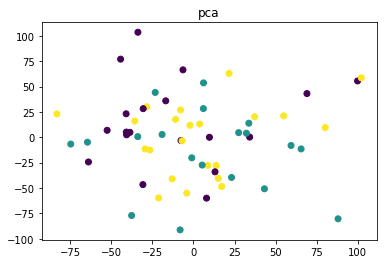

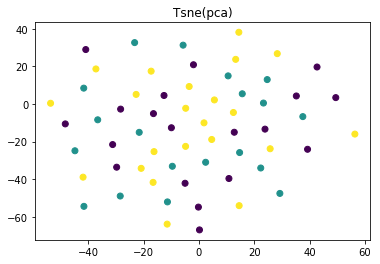

In [53]:
X, y = samples_generator.make_classification(
    n_features=100, n_informative=90, n_redundant=10, n_classes=3,
    n_clusters_per_class=1,
    n_samples=60)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
print('PCA shape', X_pca.shape, np.sum(pca.explained_variance_ratio_))
tsne = TSNE()
X_pca_tsne = tsne.fit_transform(X_pca)
print('tsne shape', X_pca_tsne.shape)

def plt_scatter(X, y, title):   
    plt.scatter(x=[i[0] for i in X], 
                y=[i[1] for i in X],
               c=y)
    plt.title(title)
    plt.show()

plt_scatter(X_pca, y, 'pca')
plt_scatter(X_pca_tsne, y, 'Tsne(pca)')

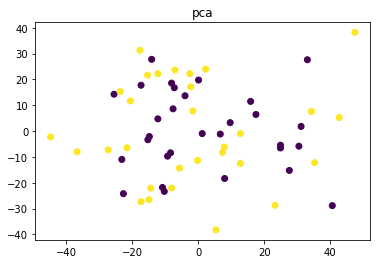

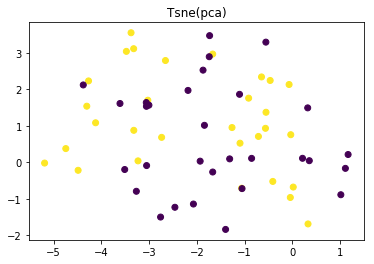